In [1]:
import json

import aemeasure
import matplotlib.pyplot as plt
import seaborn as sns

## Load experiment data

In [2]:
experiment_table = aemeasure.read_as_pandas_table("results/integration_60it_60sec")
# experiment_table.set_index("instance", inplace=True)
experiment_table

,instance,n_concrete,n_all,iter_time_limit,iterations,lns_symmetry_breaking,iter_lb,iter_ub,iter_stop,iter_ub_events,...,score,runtime,stdout,stderr,timestamp,hostname,argv,git_revision,python_env,cwd
0,busybox-case_study-2008-03-20_16-04-36,534,535,60.0,60,True,"[14, 14, 14, 16, 18, 24, 25, 25, 25, 25, 25, 2...","[43, 42, 41, 41, 40, 40, 38, 37, 35, 35, 34, 3...","[1.6912014484405518, 3.2120368480682373, 4.795...","[[[0.9735357761383057, neighborhood_selected],...",...,25,339.588084,STARTING EXPERIMENT. USE LNS IN SYMMETRY BREAK...,,2023-03-16T22:25:05.063097,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,60f202a12db10525fc90ef89ffac7fcaf2fcdb6c,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
1,busybox-case_study-2007-10-29_19-33-26,474,475,60.0,60,True,"[14, 14, 18, 18, 23, 23, 27, 31, 31, 31, 31, 3...","[45, 43, 41, 40, 40, 40, 39, 38, 37, 35, 34, 3...","[1.5927050113677979, 3.4175314903259277, 5.111...","[[[0.66782546043396, neighborhood_selected], [...",...,31,1158.953192,STARTING EXPERIMENT. USE LNS IN SYMMETRY BREAK...,,2023-03-16T21:58:10.420921,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,60f202a12db10525fc90ef89ffac7fcaf2fcdb6c,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
2,uclibc-case-study-2017-12-31_11-12-07,234,235,60.0,60,False,"[158, 158, 174, 185, 198, 234, 251, 300, 332, ...","[347, 347, 347, 347, 347, 347, 347, 347, 347, ...","[1.7699811458587646, 3.117201089859009, 4.0933...","[[[0.9676892757415771, neighborhood_selected],...",...,345,997.023299,STARTING EXPERIMENT. USE LNS IN SYMMETRY BREAK...,,2023-03-16T21:44:11.787944,algry04,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,60f202a12db10525fc90ef89ffac7fcaf2fcdb6c,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
3,busybox-case_study-2010-03-21_19-12-03,624,625,60.0,60,False,"[5, 5, 5, 5, 9, 9, 9, 9, 9, 13, 13, 13, 13, 13...","[38, 38, 38, 37, 37, 36, 36, 35, 33, 32, 32, 3...","[2.1095192432403564, 3.6155271530151367, 4.866...","[[[1.1993341445922852, neighborhood_selected],...",...,22,2364.133745,STARTING EXPERIMENT. USE LNS IN SYMMETRY BREAK...,,2023-03-16T18:05:37.754854,algry01,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,60f202a12db10525fc90ef89ffac7fcaf2fcdb6c,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
4,toybox-case-study-2017-05-08_22-09-08,119,120,60.0,60,True,"[5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8.0...","[17, 17, 17, 16, 15, 15, 15, 14, 13, 13, 12, 1...","[0.13814949989318848, 0.3100244998931885, 2.96...","[[[0.011503458023071289, neighborhood_selected...",...,12,1749.014133,STARTING EXPERIMENT. USE LNS IN SYMMETRY BREAK...,,2023-03-16T23:27:57.122148,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,60f202a12db10525fc90ef89ffac7fcaf2fcdb6c,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,soletta-case-study-2016-06-07_14-19-55,435,436,60.0,60,True,"[7, 7, 8.0, 10.0, 13.0, 16, 16, 30, 30, 37, 37...","[57, 57, 53, 51, 51, 48, 48, 45, 43, 41, 39, 3...","[2.1250460147857666, 2.7619588375091553, 5.181...","[[[0.5352237224578857, neighborhood_selected],...",...,37,294.564701,STARTING EXPERIMENT. USE LNS IN SYMMETRY BREAK...,,2023-03-16T20:54:33.863163,algry01,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,60f202a12db10525fc90ef89ffac7fcaf2fcdb6c,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
65,FinancialServices01-2017-10-20_00-00-00,555,1941,60.0,60,True,"[2173, 2223, 2271, 2311, 2402, 2489, 2587, 269...","[3181, 3181, 3181, 3181, 3181, 3181, 3181, 318...","[90.49692058563232, 153.67739939689636, 208.87...","[[[52.277315855026245, neighborhood_selected],...",...,3181,3609.668683,STARTING E

## Load and format reference data

In [3]:
optimal_instances = experiment_table[experiment_table["optimal"] is True]
non_optimal_instances = experiment_table[experiment_table["optimal"] is False]

In [4]:
print(
    f"Optimally solved instances: {len(optimal_instances)} ({round(len(optimal_instances) * 100.0 / len(experiment_table), 2)}%)"
)

Optimally solved instances: 41 (59.42%)


In [5]:
avg_time_until_optimal = sum(optimal_instances["runtime"]) / len(optimal_instances)
print(f"Average time until optimal solution: {avg_time_until_optimal / 60.0} minutes.")

Average time until optimal solution: 7.910377071138211 minutes.


# Create and export Plots

In [6]:
sns.set_theme()
tuples = []

In [7]:
# # individual plots

# for i, row in tqdm(experiment_table.iterrows(), total = len(experiment_table)):
#     instance = row["instance"]
#     os.makedirs(f"plots/integration/{instance}", exist_ok=True)

#     it_lbs = list(row["iter_lb"])
#     it_ubs = list(row["iter_ub"])
#     it_sec = list(row["iter_stop"])

#     lns_symm = bool(row["lns_symmetry_breaking"])

#     plt.clf()
#     pic = seaborn.lineplot(x=it_sec, y=it_lbs)
#     pic = seaborn.lineplot(x=it_sec, y=it_ubs)
#     pic.set(xlabel ="runtime (minutes)", ylabel = "bounds", title = instance)
#     plt.ylim(bottom=0)
#     #plt.legend(["Best CDS (LB)", "Best valid sample size (UB)"])
#     plt.savefig(f"plots/integration/{instance}/score_over_time_{lns_symm}.pdf")

# Comparison to Reference UB

In [8]:
# EXPERIMENT_INSTANCE_ROOT = abspath(expanduser("~/git/software-configuration-problem/instances"))
# EXPERIMENT_INSTANCE_FOLDERS = [
#     os.path.join(EXPERIMENT_INSTANCE_ROOT, "busybox-case_study"),
#     os.path.join(EXPERIMENT_INSTANCE_ROOT, "fiasco-case-study"),
#     os.path.join(EXPERIMENT_INSTANCE_ROOT, "soletta-case-study"),
#     os.path.join(EXPERIMENT_INSTANCE_ROOT, "toybox-case-study"),
#     os.path.join(EXPERIMENT_INSTANCE_ROOT, "uclibc-case-study"),
#     os.path.join(EXPERIMENT_INSTANCE_ROOT, "FinancialServices01")
# ]

# best_ub = dict()

# for path in EXPERIMENT_INSTANCE_FOLDERS:
#     for root, dirs, files in tqdm(os.walk(os.path.join(path, "020_samples"))):
#         for file in files:
#             for instance in experiment_table["instance"].unique():
#                 if instance.split("-")[0] in str(root):
#                     if file.split(".")[0] in instance:
#                         # found solution to instance
#                         path = os.path.join(root, file)
#                         ubs = list()
#                         for algo, solutions in parse_solutions(path).items():
#                             for sol in solutions.values():
#                                 if len(sol) > 0:
#                                     ubs.append((algo, len(sol)))
#                         best_ub[instance] = min(ubs, key=lambda t: t[1])
#                         print(f"{instance}: {best_ub[instance]}")

In [9]:
# jdata = {n: {"ref_algo": best_ub[n][0], "ref_ub": best_ub[n][1]} for n in experiment_table["instance"] }
# with open("ref_best_ub.json", "w") as f:
#     json.dump(jdata, f, indent=4)

In [10]:
ref_results = {}
with open("ref_best_ub.json") as f:
    ref_results = json.load(f)
ref_results

{'busybox-case_study-2008-03-20_16-04-36': {'ref_algo': 'yasa', 'ref_ub': 43},
 'busybox-case_study-2007-10-29_19-33-26': {'ref_algo': 'yasa', 'ref_ub': 46},
 'uclibc-case-study-2017-12-31_11-12-07': {'ref_algo': 'icpl', 'ref_ub': 347},
 'busybox-case_study-2010-03-21_19-12-03': {'ref_algo': 'yasa', 'ref_ub': 38},
 'toybox-case-study-2017-05-08_22-09-08': {'ref_algo': 'yasa', 'ref_ub': 17},
 'fiasco-case-study-2019-01-07_10-47-04': {'ref_algo': 'icpl', 'ref_ub': 206},
 'fiasco-case-study-2018-02-09_09-07-49': {'ref_algo': 'chvatal',
  'ref_ub': 195},
 'soletta-case-study-2015-11-06_15-00-32': {'ref_algo': 'icpl', 'ref_ub': 42},
 'FinancialServices01-2018-05-09_00-00-00': {'ref_algo': 'phillip',
  'ref_ub': 4345},
 'fiasco-case-study-2020-10-20_12-35-53': {'ref_algo': 'yasa', 'ref_ub': 220},
 'soletta-case-study-2016-05-10_16-53-29': {'ref_algo': 'icpl', 'ref_ub': 56},
 'uclibc-case-study-2016-11-29_08-38-20': {'ref_algo': 'chvatal',
  'ref_ub': 313},
 'toybox-case-study-2007-04-30_00-0

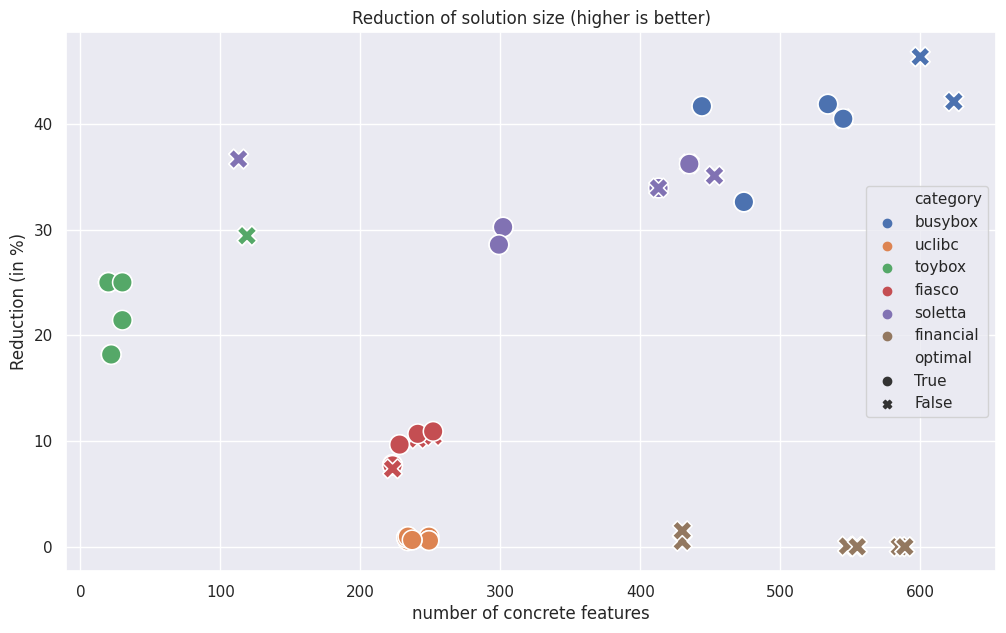

In [11]:
experiment_table["ref_ub"] = experiment_table["instance"].map(
    lambda s: int(ref_results[s]["ref_ub"])
)
experiment_table["ref_algo"] = experiment_table["instance"].map(
    lambda s: ref_results[s]["ref_algo"]
)
experiment_table["perc_score"] = 100.0 - (
    100.0 * experiment_table["score"] / experiment_table["ref_ub"]
)
experiment_table["final_lb"] = experiment_table["iter_lb"].map(lambda l: int(l[-1]))
experiment_table["total_gap"] = experiment_table["score"] - experiment_table["final_lb"]
experiment_table["perc_gap"] = (
    experiment_table["total_gap"]
    / ((experiment_table["score"] + experiment_table["final_lb"]) / 2)
) * 100.0


def get_label(s: str) -> str:
    s = s.split("-")[0].lower()
    if "financial" in s:
        return "financial"
    return s


experiment_table["category"] = experiment_table["instance"].map(get_label)

fig = plt.figure()
fig.set_size_inches(12, 7)
plot = sns.scatterplot(
    data=experiment_table,
    x="n_concrete",
    y="perc_score",
    hue="category",
    style="optimal",
    style_order=[True, False],
    s=200,
)
plot.set_title("Reduction of solution size (higher is better)")
plot.set_ylabel("Reduction (in %)")
plot.set_xlabel("number of concrete features")
sns.move_legend(plot, "center right")

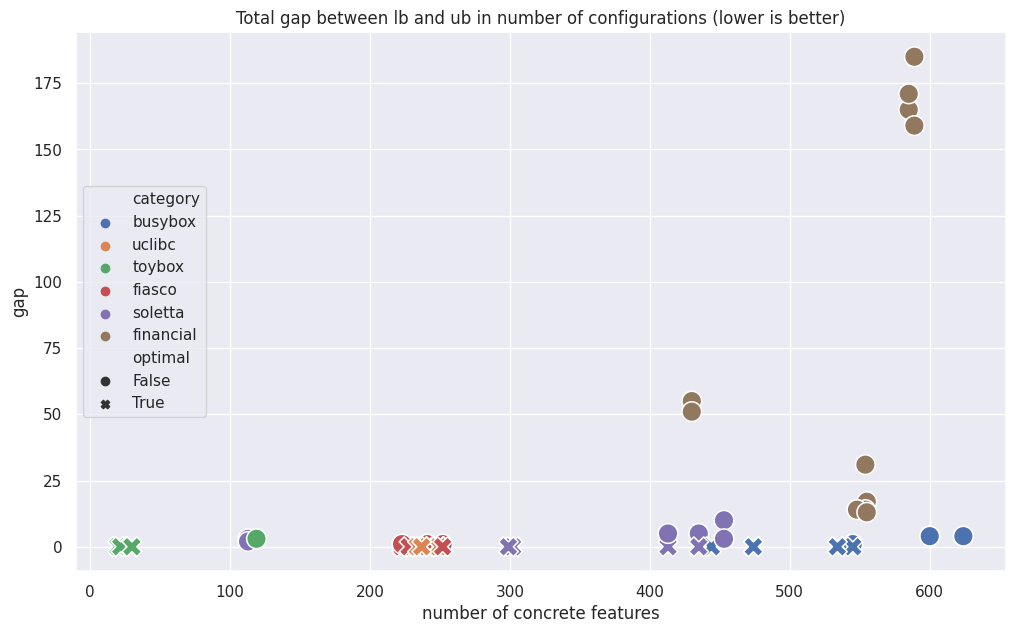

In [12]:
fig = plt.figure()
fig.set_size_inches(12, 7)
plot = sns.scatterplot(
    data=experiment_table,
    x="n_concrete",
    y="total_gap",
    hue="category",
    style="optimal",
    s=200,
)
plot.set_title(
    "Total gap between lb and ub in number of configurations (lower is better)"
)
plot.set_ylabel("gap")
plot.set_xlabel("number of concrete features")
sns.move_legend(plot, "center left")

Text(0.5, 0, 'number of concrete features')

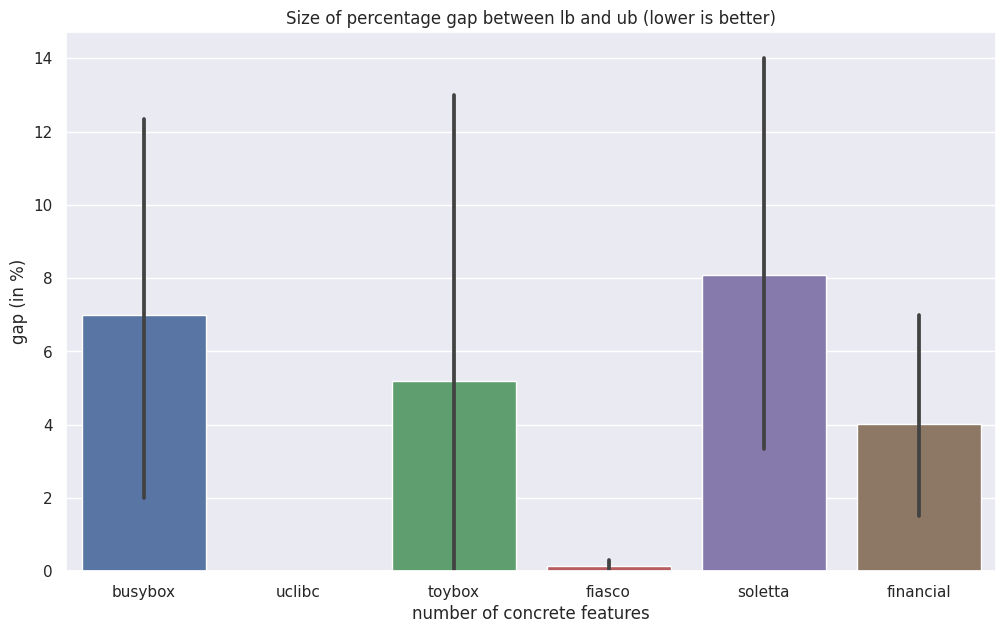

In [13]:
fig = plt.figure()
fig.set_size_inches(12, 7)
plot = sns.barplot(data=experiment_table, x="category", y="perc_gap")
plot.set_title("Size of percentage gap between lb and ub (lower is better)")
plot.set_ylabel("gap (in %)")
plot.set_xlabel("number of concrete features")
# seaborn.move_legend(plot, "center right")